Predicting and understanding different key outcomes in a student’s academic trajectory such as grade point average, academic retention, and degree completion would allow targeted intervention programs in higher education. Most of the predictive models developed for those key outcomes have been based on traditional methodological approaches. However, these models assume linear relationships between variables and do not always yield accurate predictive classifications. On the other hand, the use of machine-learning approaches such as artificial neural networks has been very effective in the classification of various educational outcomes, overcoming the limitations of traditional methodological approaches. Details of student admissions to colleges in the university, divided across ethnicity from different joining years with added identifiers like average GPA of batch and co-ordinates of colleges and schools.

## Data

For this study, we have data with 8 columns.

**GPA** - commonly used indicator of an individual's academic achievement in school.

**Miles from Home** - Distance from home.

**College** - Dataset has 5 Different types of study area.

**Accommodations** - A dorm, off-campus and other type living place.

**Years Off** - Each person has various years on college.

**Part-Time Work Hours** - It is show that student's part time work during a week.

**Attends Office Hours** - It is show that student's office work during a week.

**High School GPA** - This column contains GPA level of a student.

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Data load

In [2]:
df = pd.read_csv(".\\data\\Freshmen.csv")

In [3]:
df

,GPA,Miles from Home,College,Accommodations,Years Off,Part-Time Work Hours,Attends Office Hours,High School GPA
0,0.73,253,Social Sciences,Dorm,4,35,Sometimes,3.23
1,1.60,143,Social Sciences,Dorm,5,30,Never,2.35
2,2.17,171,Social Sciences,Dorm,0,25,Never,3.95
3,1.02,332,Sciences,Off-campus,5,30,Sometimes,3.44
4,3.14,112,Business,Dorm,0,25,Sometimes,3.20
...,...,...,...,...,...,...,...,...
95,3.63,118,Social Sciences,Dorm,1,35,Sometimes,3.09
96,2.51,34,Social Sciences,Dorm,0,30,Regularly,2.62
97,2.01,353,Social Sciences,Dorm,1,20,Regularly,3.01
98,2.33,388,Business,Dorm,4,20,Regularly,3.13


In [4]:
df['Years Off'].value_counts()

5    22
1    18
4    17
0    17
2    15
3    11
Name: Years Off, dtype: int64

#### Check data

In [5]:
# Shape of data
df.shape

(100, 8)

Shape of data has 100 row and 8 columns.

In [6]:
# Null values of data
df.isna().sum()

GPA                     0
Miles from Home         0
College                 0
Accommodations          0
Years Off               0
Part-Time Work Hours    0
Attends Office Hours    0
High School GPA         0
dtype: int64

There is no any missing value in dataset

In [7]:
# Statistical Summary
df.describe()

,GPA,Miles from Home,Years Off,Part-Time Work Hours,High School GPA
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.216300,259.590000,2.590000,19.900000,3.012400
std,0.889653,147.238561,1.820728,12.572617,0.390925
min,0.120000,4.000000,0.000000,0.000000,2.140000
25%,1.665000,143.000000,1.000000,10.000000,2.737500
50%,2.180000,232.000000,2.500000,20.000000,3.075000
75%,2.842500,399.000000,4.000000,30.000000,3.230000
max,3.900000,494.000000,5.000000,40.000000,3.990000


We see that min age is less than 1 and max age up to 4. 

Min miles from home is 4 of min and max is 494. altough min age is 4, 1/4 section of dataset has 143.

Years off, min is less than 1 and max is 5.

## Exploratory Data Analysis

A Jointplot comprises three plots. Out of the three, one plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X).

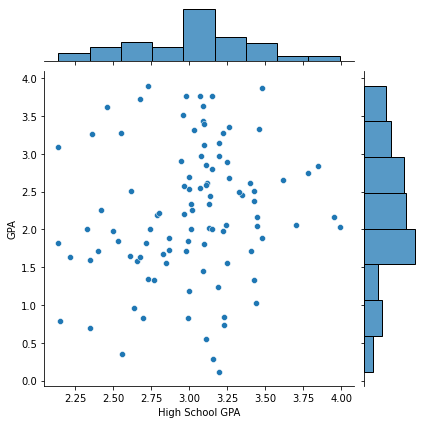

In [8]:
sns.jointplot(x='High School GPA',y ='GPA', data = df)

The Jointplot shows us GPA and High School GPA relation. Mean of both features has high value.

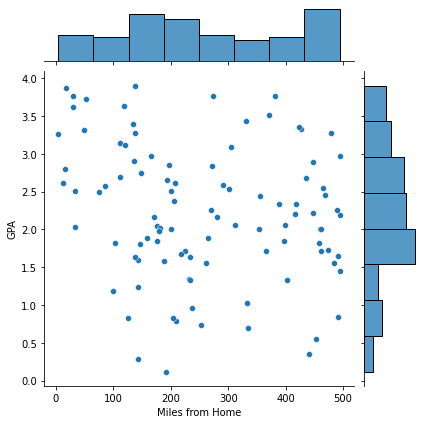

In [9]:
sns.jointplot(x='Miles from Home',y ='GPA', data = df)

The relation for GPA and Miles from Home.

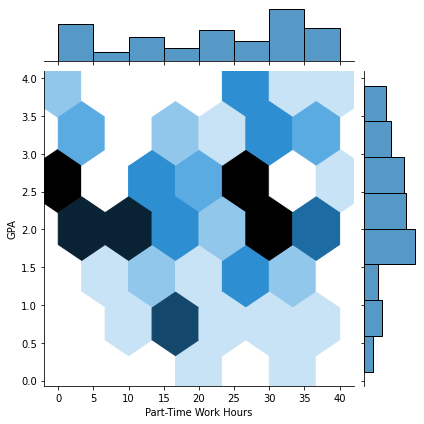

In [10]:
sns.jointplot(x='Part-Time Work Hours',y ='GPA', data = df,kind='hex')

Using hex visualtion tyoe and view relation for GPA and Part-Time Work Hours relation.

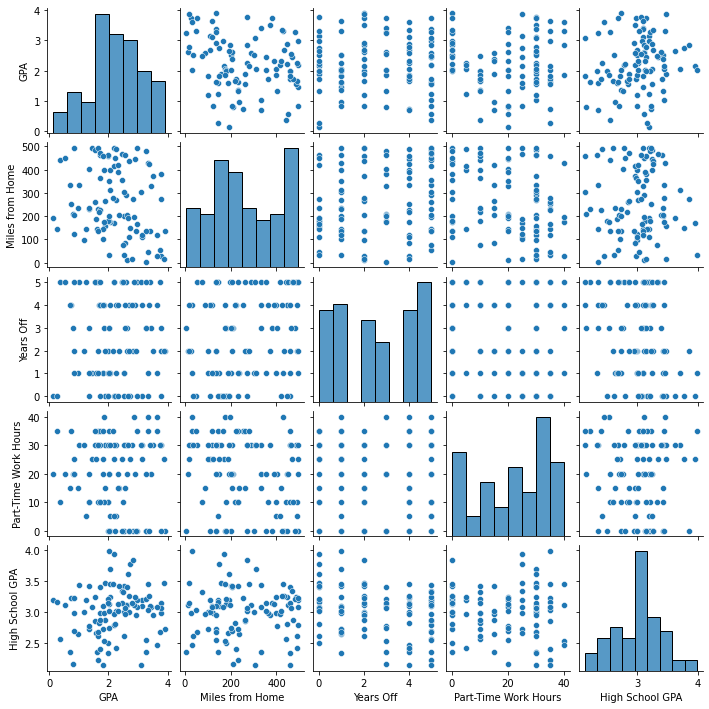

In [11]:
sns.pairplot(df, height=2, aspect=1,)

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. That creates plots as shown above.

# Data Processing

In [12]:
# Type of data
df.dtypes

GPA                     float64
Miles from Home           int64
College                  object
Accommodations           object
Years Off                 int64
Part-Time Work Hours      int64
Attends Office Hours     object
High School GPA         float64
dtype: object

Dataset has some categorical features, need to convert numerical values. For this l used dummy fuction.

In [13]:
# Encoding object Data
# Chnage type of object data to category
df['College'] = df['College'].astype('category')
df['College'] = df['College'].cat.codes
df['Accommodations'] = df['Accommodations'].astype('category')

In [14]:

df_dummies=pd.get_dummies(df,drop_first=True)

# Display top 5 records
df_dummies.head()

,GPA,Miles from Home,College,Years Off,Part-Time Work Hours,High School GPA,Accommodations_Off-campus,Accommodations_Other,Attends Office Hours_Regularly,Attends Office Hours_Sometimes
0,0.73,253,4,4,35,3.23,0,0,0,1
1,1.60,143,4,5,30,2.35,0,0,0,0
2,2.17,171,4,0,25,3.95,0,0,0,0
3,1.02,332,3,5,30,3.44,1,0,0,1
4,3.14,112,0,0,25,3.20,0,0,0,1


A dummy variable is a variable that takes values of 0 and 1, where the values indicate the presence or absence of something. Where a categorical variable has more than two categories, it can be represented by a set of dummy variables, with one variable for each category. 

Compute coorrelation between fratures.

In [15]:
view  = df_dummies.corr(method='pearson')
view.style.background_gradient(cmap='coolwarm').set_precision(2)

,GPA,Miles from Home,College,Years Off,Part-Time Work Hours,High School GPA,Accommodations_Off-campus,Accommodations_Other,Attends Office Hours_Regularly,Attends Office Hours_Sometimes
GPA,1.00,-0.21,0.04,-0.01,-0.02,0.15,-0.13,-0.09,0.37,-0.11
Miles from Home,-0.21,1.00,0.07,0.18,-0.21,-0.02,-0.02,0.13,-0.06,0.02
College,0.04,0.07,1.00,0.03,0.11,-0.12,-0.01,-0.04,0.06,-0.06
Years Off,-0.01,0.18,0.03,1.00,-0.05,-0.28,0.07,0.00,-0.01,0.04
Part-Time Work Hours,-0.02,-0.21,0.11,-0.05,1.00,-0.04,0.12,-0.14,-0.17,0.03
High School GPA,0.15,-0.02,-0.12,-0.28,-0.04,1.00,-0.17,-0.01,0.09,0.07
Accommodations_Off-campus,-0.13,-0.02,-0.01,0.07,0.12,-0.17,1.00,-0.38,-0.11,-0.10
Accommodations_Other,-0.09,0.13,-0.04,0.00,-0.14,-0.01,-0.38,1.00,0.12,0.08
Attends Office Hours_Regularly,0.37,-0.06,0.06,-0.01,-0.17,0.09,-0.11,0.12,1.00,-0.49
Attends Office Hours_Sometimes,-0.11,0.02,-0.06,0.04,0.03,0.07,-0.10,0.08,-0.49,1.00


We see there is no high level correlations between features in dataset.

In [16]:
# Specifying the X and Y

X=df_dummies.iloc[:,1:]
y=df_dummies.GPA

### Train-Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [18]:
X_train.shape

(80, 9)

In [19]:
X_test.shape

(20, 9)

In [20]:
#Scaling the features


sc_X = StandardScaler()

# Fit and Transform

X_trains = sc_X.fit_transform(X_train)
X_tests = sc_X.transform(X_test)

# Training the Model

### Mean Absolute Error

In [21]:
model = LinearRegression()

model.fit(X_trains,y_train)

ypred= model.predict(X_tests)

MAE = mean_absolute_error(y_test, ypred)
print("Mean Absolute Error: %.3f" % (MAE ))

Mean Absolute Error: 0.750


### Mean Squared Error

In [22]:
model = LinearRegression()

model.fit(X_trains,y_train)

ypred= model.predict(X_tests)

MSE = mean_squared_error(y_test, ypred)
print("Mean Squared Error: %.3f" % (MSE ))

Mean Squared Error: 0.756


### R^2 Metric

In [23]:
model = LinearRegression()

model.fit(X_trains,y_train)

ypred= model.predict(X_tests)

R2 = r2_score(y_test, ypred)
print("R Squared Error: %.3f" % (R2))

R Squared Error: 0.294


# Conclusion

In [24]:
print('MAE: %.3f '%(MAE))
print('MSE: %.3f'%(MSE))
print('RMSE:%.3f'%(R2))

MAE: 0.750 
MSE: 0.756
RMSE:0.294


I have used 3 regression metrics to estimate min error of freshmen Dataset. Linear model used and measured and visualized the performance of the models. 

We see mean absolute and Squared Error (0.750) is close eah other (0.756).

R square is 0.294.